In [76]:
using Plots
using LaTeXStrings

In [77]:
ϵ = 0.1
domain = (0,1)
τ = LinRange(0, 1, 1000)
θ = (LinRange(0, 1, 1000))

τ_exact(y) = (1/3)*log((1+ϵ*y^3)/((1+ϵ)*y^3))
θ_approx(x) = exp(-x) + (ϵ/3)*exp(-4*x) + (2ϵ^2/9)*exp(-7x)

θ_approx (generic function with 1 method)

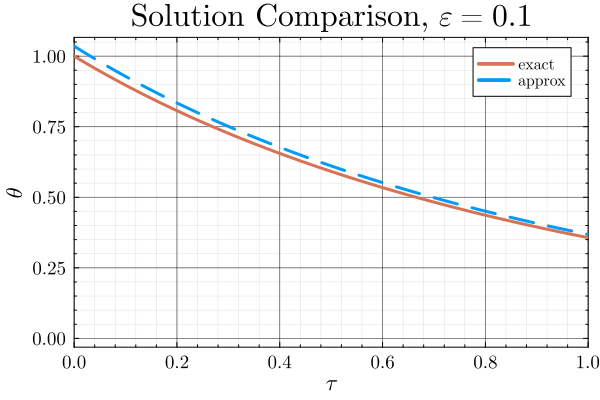

In [78]:
theme(:dao::Symbol)

myplot = plot([τ_exact.(θ), τ], [θ, θ_approx.(τ)], 
    labels=["exact" "approx"],
    xlims=domain,
    #markersize=2,
    linestyle=[:solid :dash],
    lw=3,
    legend=:best,
    title="Solution Comparison, "*L"$\epsilon=$"*"$ϵ",
    xlabel=L"$\tau$",
    ylabel=L"$\theta$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    )

# savefig(myplot, "Aero_HW2_Prob3_eps01.pdf")
myplot

Now for Problem 2: the asymptotic expansion of arcsech(x)

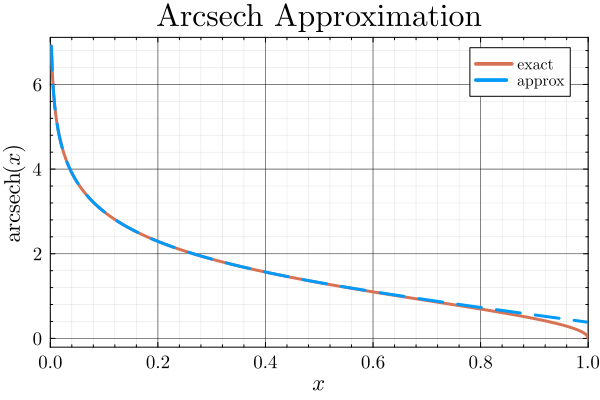

In [94]:
# Chat GPT says the following is a 3-term approximation for arcsech(x) for small ϵ

gpt_approx(x) = log(2 / x) - (x^2 / 4) - (x^4 / 16)
x = LinRange(0,1,500)

myplot2 = plot(x, [asech.(x) gpt_approx.(x)], 
    labels=["exact" "approx"],
    xlims=domain,
    #markersize=2,
    linestyle=[:solid :dash],
    lw=3,
    legend=:best,
    title="Arcsech Approximation",
    xlabel=L"$x$",
    ylabel=L"$\operatorname{arcsech}(x)$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    )

savefig(myplot2, "Aero_HW2_Prob2.pdf")
myplot2

Below is random stuff from trying to find metric tensor in tokamak coordinates... lol

In [95]:
using Symbolics

In [96]:
@variables ζ θ r R₀;

J = [sin(ζ)*cos(θ) cos(ζ)*cos(θ) sin(θ);
    -r*sin(ζ)*sin(θ) -r*cos(ζ)*sin(θ) r*cos(θ);
    (R₀ + r*cos(θ))*cos(ζ) (-r*cos(θ) - R₀)*sin(ζ) 0]

3×3 Matrix{Num}:
          cos(θ)*sin(ζ)            cos(θ)*cos(ζ)    sin(θ)
       -r*sin(ζ)*sin(θ)         -r*cos(ζ)*sin(θ)  r*cos(θ)
 (R₀ + r*cos(θ))*cos(ζ)  (-R₀ - r*cos(θ))*sin(ζ)         0

In [112]:
using LinearAlgebra;

In [137]:
tokamak_metric = simplify(J' * I * J)

simplify(tokamak_metric)

3×3 Matrix{Num}:
                       (cos(θ)^2)*(sin(ζ)^2) + ((R₀ + r*cos(θ))^2)*(cos(ζ)^2) + (r^2)*(sin(ζ)^2)*(sin(θ)^2)  …  cos(θ)*sin(ζ)*sin(θ) - (r^2)*cos(θ)*sin(ζ)*sin(θ)
 (cos(θ)^2)*sin(ζ)*cos(ζ) + (r^2)*sin(ζ)*cos(ζ)*(sin(θ)^2) + (-R₀ - r*cos(θ))*(R₀ + r*cos(θ))*sin(ζ)*cos(ζ)     cos(θ)*cos(ζ)*sin(θ) - (r^2)*cos(θ)*cos(ζ)*sin(θ)
                                                          cos(θ)*sin(ζ)*sin(θ) - (r^2)*cos(θ)*sin(ζ)*sin(θ)                           sin(θ)^2 + (r^2)*(cos(θ)^2)